In [159]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib_inline as plt


In [160]:
file="Dataset.csv"
df=pd.read_csv(file)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [161]:
df.replace({"yes":1,"no":0}, inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Getiing Dummies for furnished status column

In [162]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [163]:
df["furnished"]=pd.get_dummies(df.furnishingstatus)["furnished"]
df["unfurnished"]=pd.get_dummies(df.furnishingstatus)["unfurnished"]
df["semi_furnished"]=pd.get_dummies(df.furnishingstatus)["semi-furnished"]

In [164]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,unfurnished,semi_furnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881,0.326606,0.416514
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314,0.469402,0.493434
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Test data split : 70 % of main data 

In [165]:
testdf=df[df.index<(len(df)*.7)] # Test Data split (upper 70% data)
traindf=df[df.index>=(len(df)*.7)] # Training data split (bottom 30 % data )

In [166]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,unfurnished,semi_furnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881,0.326606,0.416514
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314,0.469402,0.493434
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
 13  furnished         545 non-null    uint8 
 14  unfurnished       545 non-null    uint8 
 15  semi_furnished    545 non-null    uint8 
dtypes: int64(12), object(1), uint8(3)
memory usage: 57.1+ KB


In [179]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
furnished           0
unfurnished         0
semi_furnished      0
dtype: int64

In [180]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,unfurnished,semi_furnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,-0.280587,0.063656
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,-0.142278,0.006156
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,-0.126252,0.050040
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,-0.132107,0.029834
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.082972,-0.003648
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,-0.133123,0.011450
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,-0.099023,0.005821
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,-0.117935,0.050284
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,-0.059194,0.063819
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.094086,-0.053179


<AxesSubplot: >

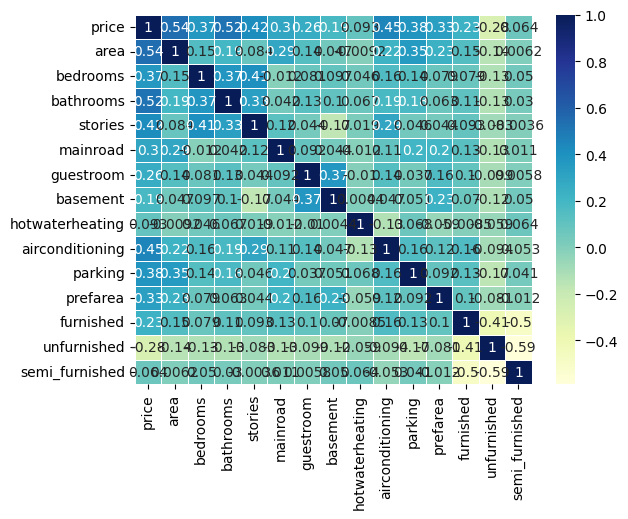

In [193]:
# sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linewidths=.5)
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linewidths=.5)

- Dependant Variable : "PRICE",
- Indpendent Variable: "area","bedrooms","bathrooms","stories","parking"

In [171]:
px.line(df,df.index,"price")

Machine Learning :  Supervised Learning- Regression Model

In [172]:
x=np.array(testdf[["area","bedrooms","bathrooms","stories","parking"]])
y=np.array(testdf.price)
reg=LinearRegression().fit(x,y)
reg.coef_
reg.intercept_


930889.1142364135

In [173]:
# Predict Code:
prex=np.array(traindf[["area","bedrooms","bathrooms","stories","parking"]])
prey=np.array(traindf.price)
predictedprice=reg.predict(prex)


In [174]:
predictedprice=list(predictedprice)
traindf["predprice"]=predictedprice

C:\Users\MAYANK\AppData\Local\Temp\ipykernel_13096\1220188873.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [175]:
px.line(traindf,traindf.index,"price")


In [176]:
px.line(traindf,traindf.index,"predprice")

In [177]:
traindf.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,unfurnished,semi_furnished,predprice
price,1.000000,0.228206,0.117839,0.014738,0.111409,0.137117,-0.014524,0.127461,-0.068696,0.109393,0.160628,0.187537,0.112842,-0.167164,0.098565,0.276454
area,0.228206,1.000000,-0.033166,-0.085186,-0.121326,0.209787,0.016597,-0.150900,-0.028805,-0.026774,0.154447,-0.063465,-0.134478,0.090248,0.010938,0.613086
bedrooms,0.117839,-0.033166,1.000000,0.088576,0.616597,-0.070902,-0.070298,0.095749,-0.001509,0.045794,0.061577,0.051959,-0.027911,-0.032098,0.062165,0.489358
bathrooms,0.014738,-0.085186,0.088576,1.000000,0.151383,-0.087908,0.331116,0.170256,-0.027682,-0.061968,0.044679,0.046350,0.129941,-0.008095,-0.103786,0.387830
stories,0.111409,-0.121326,0.616597,0.151383,1.000000,0.069777,-0.070065,0.161008,0.050275,-0.021164,0.016490,0.173444,0.089125,-0.210277,0.170052,0.513742
mainroad,0.137117,0.209787,-0.070902,-0.087908,0.069777,1.000000,-0.059114,0.095083,-0.109316,-0.037790,0.131999,0.123032,0.045867,0.015774,-0.058589,0.162751
guestroom,-0.014524,0.016597,-0.070298,0.331116,-0.070065,-0.059114,1.000000,0.217963,-0.029006,0.043067,0.023622,-0.056985,0.082781,0.031022,-0.108751,0.090827
basement,0.127461,-0.150900,0.095749,0.170256,0.161008,0.095083,0.217963,1.000000,-0.063701,0.029152,0.065929,0.130640,0.168865,-0.123336,-0.001938,0.068987
hotwaterheating,-0.068696,-0.028805,-0.001509,-0.027682,0.050275,-0.109316,-0.029006,-0.063701,1.000000,-0.041973,0.065248,-0.036836,-0.056898,0.006434,0.042041,0.013634
airconditioning,0.109393,-0.026774,0.045794,-0.061968,-0.021164,-0.037790,0.043067,0.029152,-0.041973,1.000000,-0.032946,0.004819,-0.065581,0.136355,-0.103479,-0.048898


<AxesSubplot: >

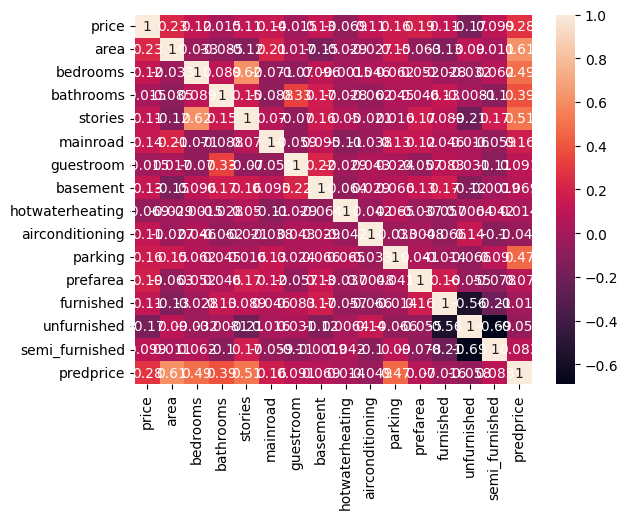

In [178]:
sns.heatmap(traindf.corr(),annot=True)